<a href="https://colab.research.google.com/github/rodrigorissettoterra/Machine-Learning/blob/main/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset

O conjunto de dados Iris é um dos mais conhecidos na área de aprendizado de máquina e análise de dados, especialmente em estudos sobre classificação. Foi criado por Ronald A. Fisher em 1936, e é frequentemente utilizado como um exemplo clássico para explorar algoritmos de classificação e visualização de dados.

## Introdução

### Contextualização do problema

No mundo moderno, onde a coleta e armazenamento de dados têm crescido exponencialmente, a análise desses dados se tornou uma ferramenta fundamental para diversas áreas, desde negócios até a biologia. O aprendizado de máquina (machine learning) é uma das principais abordagens utilizadas para extrair valor e conhecimento a partir de dados. Especificamente, os problemas de classificação ocupam uma posição central, onde o objetivo é determinar a qual categoria ou classe um determinado conjunto de observações pertence.

Um dos problemas clássicos de classificação é prever a espécie de uma flor a partir de características físicas como o comprimento e largura das sépalas e pétalas. A classificação automática dessas flores é um exemplo de como modelos de aprendizado de máquina podem ser aplicados a dados biológicos para identificar padrões e realizar previsões. Esse problema é particularmente importante porque serve como um ponto de partida para a compreensão e aplicação de técnicas mais avançadas de análise de dados e aprendizado de máquina.

### Descrição do Dataset

Este dataset contém informações sobre 150 amostras de flores de íris, divididas igualmente em três espécies: Iris-setosa, Iris-versicolor e Iris-virginica. Cada amostra é descrita por quatro características (ou variáveis preditoras) que medem dimensões das flores:

- Comprimento da sépala (sepal length) - em centímetros
- Largura da sépala (sepal width) - em centímetros
- Comprimento da pétala (petal length) - em centímetros
- Largura da pétala (petal width) - em centímetros

O objetivo ao trabalhar com esse conjunto de dados é prever a espécie da flor com base nessas quatro características. O rótulo da espécie é categórico e apresenta três classes:

- Iris-setosa (rótulo 0)
- Iris-versicolor (rótulo 1)
- Iris-virginica (rótulo 2)

Devido à simplicidade do dataset, ao seu tamanho reduzido e à sua boa separação entre classes, ele é frequentemente utilizado para demonstrar técnicas de classificação, visualização de dados e avaliação de algoritmos em ciência de dados e aprendizado de máquina.

### Objetivos do Trabalho

O objetivo deste trabalho é fornecer uma análise abrangente do dataset Iris, explorando tanto as características dos dados quanto a criação e avaliação de modelos de aprendizado de máquina. Os principais objetivos incluem:

- Análise Exploratória de Dados (EDA): Compreender a distribuição dos dados, observar as correlações entre as variáveis e identificar possíveis padrões ou discrepâncias entre as espécies.
- Desenvolvimento de Modelos Preditivos: Aplicar diferentes algoritmos de aprendizado de máquina para prever a espécie da flor com base nas características fornecidas. Isso incluirá algoritmos populares como K-Nearest Neighbors (KNN), Árvores de Decisão, e Support Vector Machines (SVM).
- Avaliação de Desempenho dos Modelos: Utilizar métricas de avaliação como acurácia, precisão, recall e F1-score, além da matriz de confusão, para medir a eficácia dos modelos.
- Comparação e Discussão dos Resultados: Comparar o desempenho dos diferentes modelos, identificando qual deles é mais adequado para o problema em questão.

## Preparando o ambiente de desenvolvimento

### Bibliotecas utilizadas

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np

### Criando o dataframe


In [13]:
# Converter os dados em um DataFrame do Pandas
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

# Definir uma lista com as colunas das características
features = iris['feature_names']

## Análise Exploratória dos Dados

### Resumo estatístico do dataframe

In [3]:
description_stats = iris_df.describe()
description_stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Visualizando alguns dados

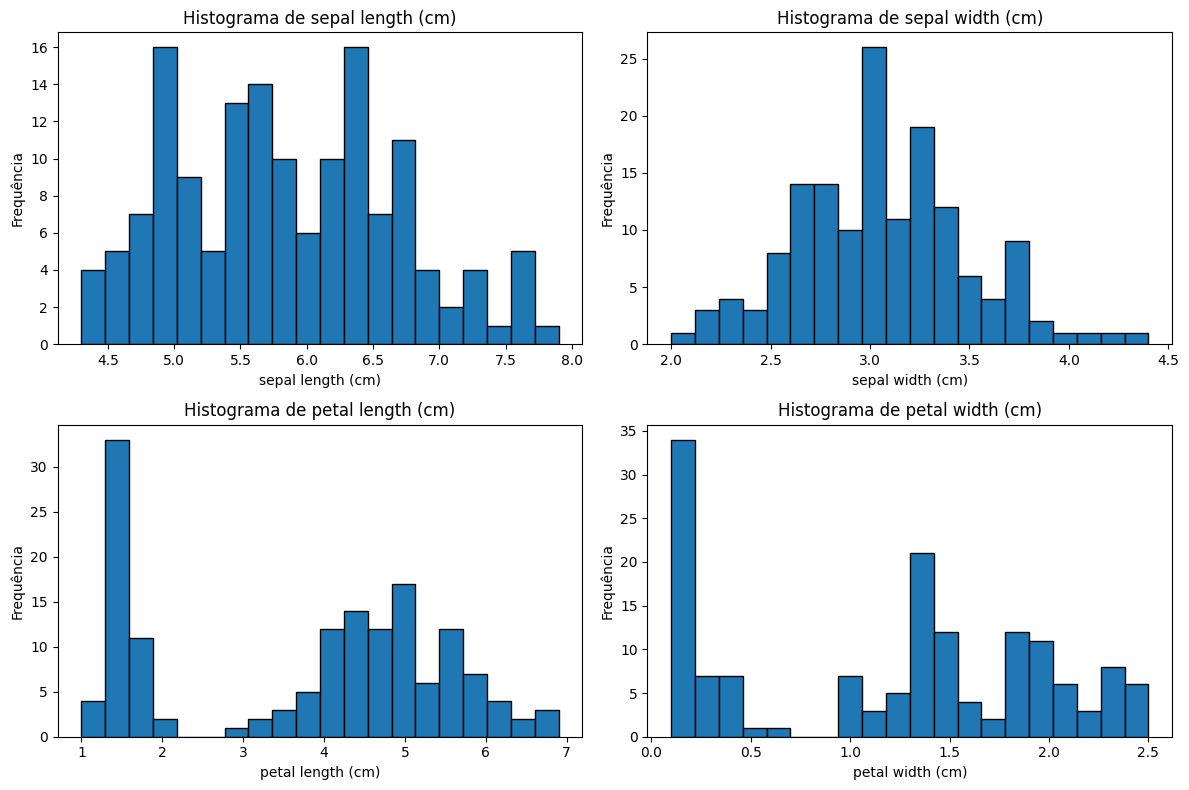

In [4]:
# Gerar histogramas para cada característica em uma matriz 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterar pelas características e eixos
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axs[row, col].hist(iris_df[feature], bins=20, edgecolor='black')
    axs[row, col].set_title(f'Histograma de {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequência')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

Os histogramas mostram a distribuição das quatro características do dataset Iris. Aqui estão as principais observações:

- Comprimento da sépala (Sepal Length):
  - A distribuição é quase normal, com uma leve assimetria à direita.
  - A maior concentração de valores está entre 5 e 6 cm, com poucos valores abaixo de 5 cm ou acima de 7 cm.

- Largura da sépala (Sepal Width):
  - A distribuição é um pouco assimétrica à esquerda, com uma maior concentração entre 2,5 e 3,5 cm.
  - Há algumas observações com largura de sépala inferior a 2,5 cm, indicando a possibilidade de outliers.

- Comprimento da pétala (Petal Length):
  - Há uma clara separação entre dois grupos distintos, com um grupo concentrado entre 1 e 2 cm e outro grupo acima de 3 cm.
  - Isso sugere que o comprimento da pétala pode ser um indicador importante para distinguir as espécies.

- Largura da pétala (Petal Width):
  - Assim como no comprimento da pétala, há uma separação nítida entre dois grupos.
  - A maioria dos valores se concentra entre 0 e 0,5 cm ou acima de 1 cm, o que sugere que essa característica também é uma boa separadora entre as espécies.

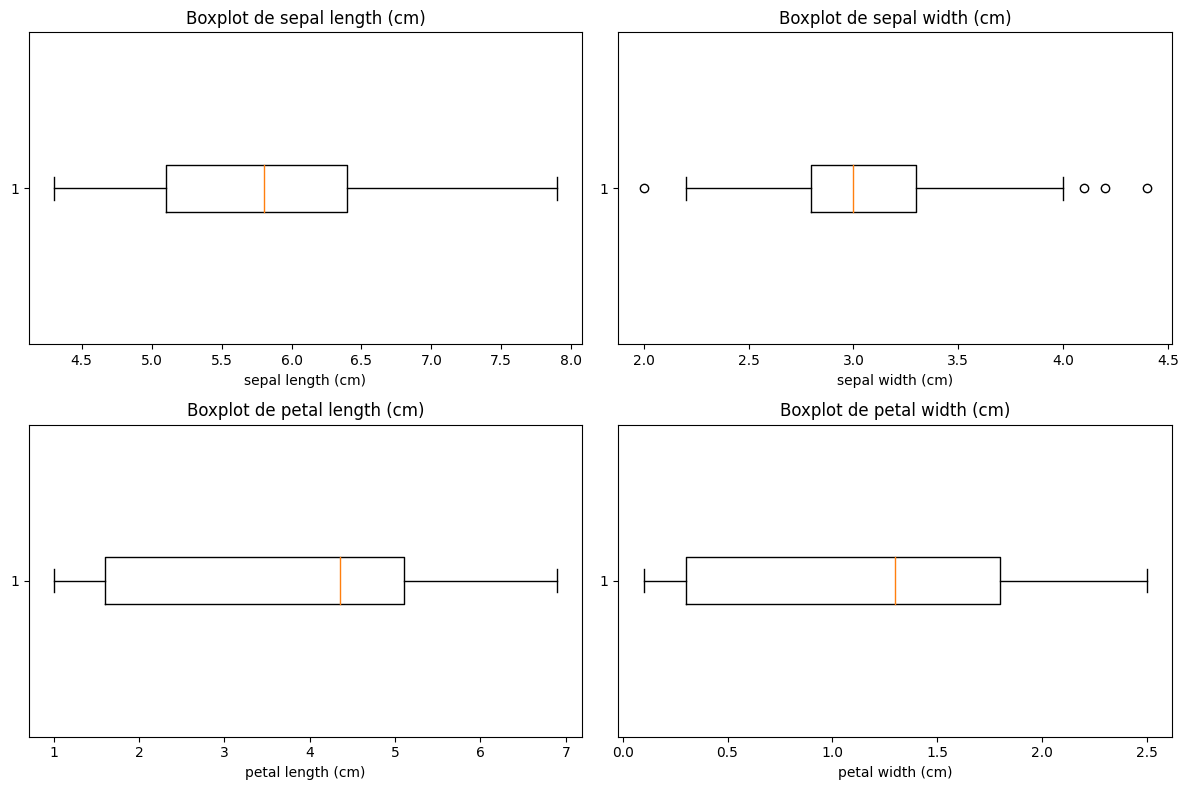

In [5]:
# Gerar boxplots para cada característica em uma matriz 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterar pelas características e eixos para gerar boxplots
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axs[row, col].boxplot(iris_df[feature], vert=False)
    axs[row, col].set_title(f'Boxplot de {feature}')
    axs[row, col].set_xlabel(feature)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

Os boxplots são úteis para identificar outliers e a dispersão dos dados. Aqui estão as principais conclusões:

- Comprimento da sépala:
  - A maioria dos valores está concentrada entre 5 e 6 cm.
  - Não há outliers visíveis, o que sugere que os dados dessa característica estão bem distribuídos.

- Largura da sépala:
  - Há vários outliers abaixo de 2,5 cm, o que indica que algumas flores têm sépalas significativamente mais estreitas do que o restante.
  - A mediana está em torno de 3 cm, e os valores são mais dispersos em relação a outras variáveis.

- Comprimento da pétala:
  - A separação clara entre dois grupos é visível no boxplot. O primeiro grupo tem valores concentrados em torno de 1,5 cm, enquanto o segundo grupo está acima de 4 cm.
  - Essa clara separação sugere que o comprimento da pétala é uma das variáveis mais discriminantes entre as espécies.

- Largura da pétala:
  - Assim como o comprimento da pétala, a largura também exibe uma clara separação entre dois grupos. A maioria dos valores está concentrada em torno de 0,2 cm para um grupo e acima de 1,2 cm para o outro.
  - Essa variável também é um excelente discriminador entre as espécies.

**Conclusões Gerais**

- As variáveis comprimento e largura da pétala parecem ser as mais relevantes para a separação entre as espécies de íris, conforme indicado pela clara separação em dois grupos tanto nos histogramas quanto nos boxplots.
- A largura da sépala tem a maior quantidade de outliers e parece ser a característica menos discriminante para as espécies, já que sua distribuição é mais dispersa e não exibe uma separação clara entre grupos.
- O comprimento da sépala é relativamente bem distribuído, sem outliers significativos, e embora não seja tão discriminante quanto as variáveis relacionadas às pétalas, ainda apresenta uma distribuição útil para a análise.

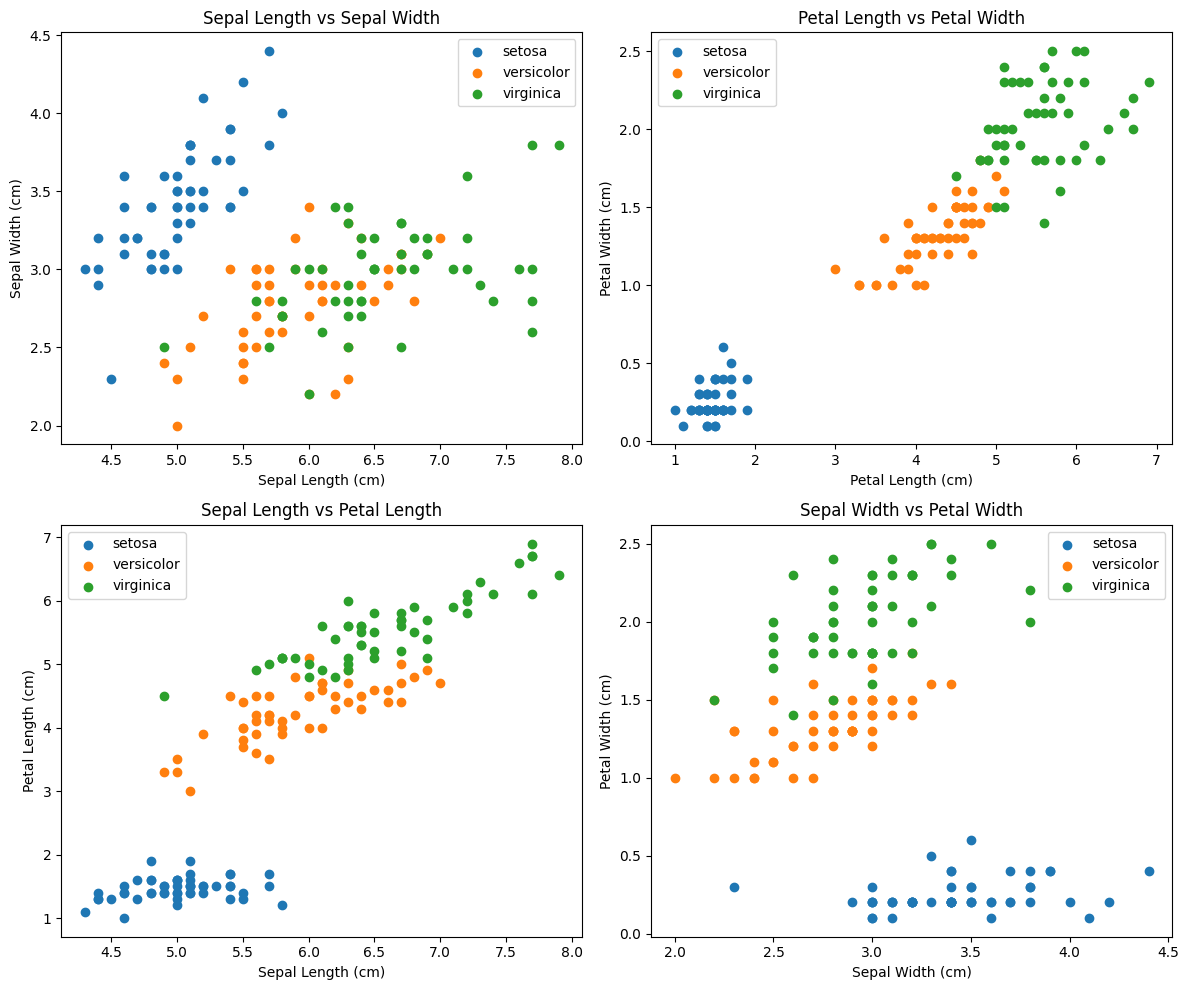

In [6]:
# Definir o mapeamento de espécies
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Criar gráficos de dispersão simples usando Matplotlib
plt.figure(figsize=(12, 10))

# Gráfico 1: Comprimento da sépala x Largura da sépala
plt.subplot(2, 2, 1)
for species, group in iris_df.groupby('species'):
    plt.scatter(group['sepal length (cm)'], group['sepal width (cm)'], label=species_map[species])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

# Gráfico 2: Comprimento da pétala x Largura da pétala
plt.subplot(2, 2, 2)
for species, group in iris_df.groupby('species'):
    plt.scatter(group['petal length (cm)'], group['petal width (cm)'], label=species_map[species])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

# Gráfico 3: Comprimento da sépala x Comprimento da pétala
plt.subplot(2, 2, 3)
for species, group in iris_df.groupby('species'):
    plt.scatter(group['sepal length (cm)'], group['petal length (cm)'], label=species_map[species])
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()

# Gráfico 4: Largura da sépala x Largura da pétala
plt.subplot(2, 2, 4)
for species, group in iris_df.groupby('species'):
    plt.scatter(group['sepal width (cm)'], group['petal width (cm)'], label=species_map[species])
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

plt.tight_layout()
plt.show()

Os gráficos de dispersão fornecem uma visão clara das relações entre as variáveis:

- Sepal Length vs Sepal Width: A separação entre as espécies é menos evidente, mas ainda assim, a espécie Iris-setosa parece formar um grupo distinto.
- Petal Length vs Petal Width: Aqui, a separação entre as espécies é muito mais clara, especialmente entre Iris-setosa e as outras duas espécies.
- Sepal Length vs Petal Length: Mostra uma separação razoável entre as espécies, com uma clara distinção para Iris-setosa.
- Sepal Width vs Petal Width: Assim como nos outros gráficos, há um bom nível de separação entre as espécies, principalmente quando olhamos para a largura das pétalas.

Esses gráficos mostram que, em geral, as variáveis relacionadas às pétalas são mais indicativas para diferenciar as espécies.

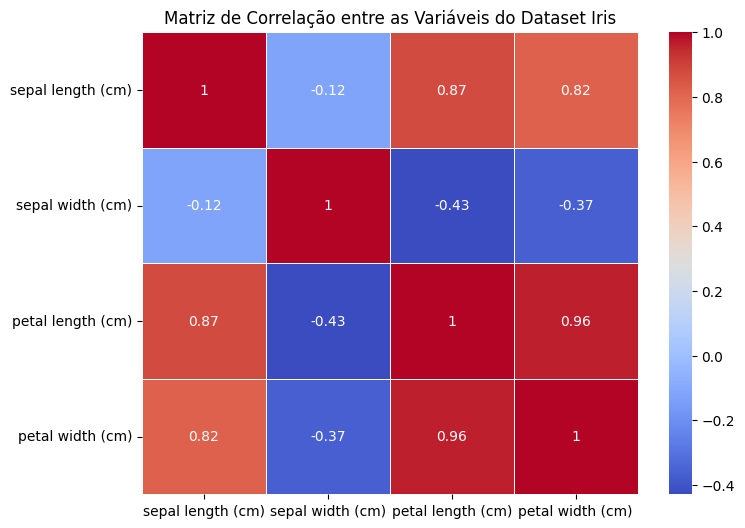

In [7]:
# Gerar matriz de correlação
correlation_matrix = iris_df.drop(columns=['species']).corr()

# Exibir a matriz de correlação usando heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre as Variáveis do Dataset Iris')
plt.show()

A matriz de correlação mostra as relações numéricas entre as características do dataset. As correlações mais fortes (mais próximas de 1 ou -1) indicam que essas variáveis têm uma forte relação linear. Aqui estão alguns pontos importantes:

- A maior correlação positiva está entre o comprimento da pétala e a largura da pétala (0,96), sugerindo que essas duas variáveis estão fortemente relacionadas.
- O comprimento da sépala tem uma correlação moderada com o comprimento da pétala (0,87).
- A largura da sépala tem correlação fraca com as outras variáveis, o que indica que ela pode não ser tão informativa quanto as outras características para prever a espécie.

### Primeiras observações

- Separação entre espécies: As características relacionadas às pétalas (comprimento e largura) parecem ser as mais indicativas para distinguir entre as espécies de íris.
- Outliers: Alguns outliers são visíveis nos boxplots, particularmente na largura da sépala, o que pode indicar valores extremos que poderiam ser analisados mais detalhadamente.
- Correlação: As variáveis relacionadas às pétalas são fortemente correlacionadas entre si, o que sugere que podem ser mais importantes para a construção de modelos preditivos.

## Pr-e-processamento dos dados

### Limpeza dos dados

Vamos começar verificando se existem valores ausentes ou inconsistentes no dataset.

In [8]:
# Converter os dados em um DataFrame do Pandas
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

# Verificar valores ausentes no dataset
missing_values = iris_df.isnull().sum()

# Exibir os valores ausentes no dataset
print(missing_values)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


### Escalonamento e Divisão dos Dados

A normalização ou padronização das variáveis é importante porque muitos algoritmos de aprendizado de máquina, como o K-Nearest Neighbors (KNN) e Support Vector Machines (SVM), são sensíveis à escala dos dados. Vamos aplicar a padronização (média = 0, desvio padrão = 1) às variáveis numéricas.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar as variáveis preditoras (features) e o alvo (target)
X = iris_df.drop(columns=['species'])
y = iris_df['species']

# Escalonar os dados com padronização (média = 0, desvio padrão = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mostrar o tamanho dos conjuntos de treino e teste
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((120, 4), (30, 4), (120,), (30,))

O pré-processamento foi realizado com sucesso:

- Os dados foram padronizados (média = 0 e desvio padrão = 1).
- O dataset foi dividido em:
  - Conjunto de treino: 120 amostras (80% dos dados).
  - Conjunto de teste: 30 amostras (20% dos dados).

Os dados estão prontos para a próxima etapa, que envolve o desenvolvimento e avaliação dos modelos preditivos.

## Modelagem Preditiva

### Escolha dos Algoritmos

Para o problema de classificação do dataset Iris, vamos utilizar alguns dos algoritmos de aprendizado de máquina mais populares e eficazes para problemas de classificação. Abaixo estão os modelos que vamos aplicar:

- K-Nearest Neighbors (KNN):
  - Um dos algoritmos de classificação mais simples, que funciona comparando uma amostra com os "k" vizinhos mais próximos no espaço de características.
  - É sensível à escala dos dados, motivo pelo qual escalonamos as variáveis no pré-processamento.

- Árvore de Decisão:
  - Cria uma árvore de decisão com base nas características dos dados, com cada nó representando uma decisão sobre uma característica e os ramos levando a diferentes classes.
  - Fácil de interpretar, mas pode ser suscetível ao overfitting.

- Random Forest:
  - Um conjunto de árvores de decisão que melhora a precisão e reduz o overfitting ao combinar os resultados de múltiplas árvores.
  - Frequentemente utilizado para classificação e muito eficaz em datasets como o Iris.

- Support Vector Machines (SVM):
  - Algoritmo poderoso que tenta encontrar um hiperplano de separação ótimo entre as classes no espaço de características.
  - Pode ser sensível à escala dos dados e ao ajuste de hiperparâmetros como o "C" e o "gamma".

### Treinamento dos modelos

In [12]:
# Importar os pacotes necessários
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inicializar os modelos
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Treinar e avaliar os modelos
models = {'KNN': knn, 'Decision Tree': tree, 'Random Forest': rf, 'SVM': svm}
model_performance = {}

for name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliar a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[name] = accuracy

# Exibir os resultados iniciais
model_performance

{'KNN': 1.0, 'Decision Tree': 1.0, 'Random Forest': 1.0, 'SVM': 1.0}

### Validação cruzada

In [14]:
from sklearn.model_selection import cross_val_score

# Aplicar validação cruzada (5 folds) para cada modelo
cross_val_results = {}

for name, model in models.items():
    # Executar a validação cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_results[name] = cv_scores.mean()

# Exibir os resultados da validação cruzada
cross_val_results

{'KNN': 0.9333333333333333,
 'Decision Tree': 0.9416666666666668,
 'Random Forest': 0.9416666666666667,
 'SVM': 0.95}

Os resultados da validação cruzada (com 5 folds) mostraram a seguinte acurácia média para cada modelo:

- KNN: 93,33%
- Árvore de Decisão: 94,17%
- Random Forest: 94,17%
- SVM: 95%

**Interpretação**

- Todos os modelos mantiveram uma performance alta, com o SVM ligeiramente à frente, alcançando a melhor média de acurácia.
- A validação cruzada sugere que a performance observada na divisão inicial treino-teste (100%) era possivelmente devido à particularidade daquela divisão, mas os modelos ainda se saem muito bem.

### Avaliação da Árvore de Decisão

In [20]:
# Treinar a Árvore de Decisão e fazer previsões
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Gerar o relatório de classificação
tree_report = classification_report(y_test, y_pred_tree, target_names=iris['target_names'], output_dict=True)

# Converter o relatório para um DataFrame para exibição em formato de tabela
tree_report_df = pd.DataFrame(tree_report).transpose()

# Exibir a tabela de relatório
print(tree_report_df)

              precision  recall  f1-score  support
setosa              1.0     1.0       1.0     10.0
versicolor          1.0     1.0       1.0      9.0
virginica           1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0


A Árvore de Decisão obteve um desempenho perfeito no conjunto de teste, com 100% de acurácia em todas as métricas (precisão, recall e F1-score) para as três classes (setosa, versicolor, virginica). Sobre o seu desempenho:

- Precisão, Recall e F1-Score: Todos os valores são 1.00, indicando que a Árvore de Decisão conseguiu classificar corretamente todas as amostras de teste.

## Avaliação de Modelos

Métricas de Avaliação: Vamos analisar as principais métricas de desempenho dos modelos:
  - Acurácia: Já foi calculada durante a validação cruzada e é uma métrica direta que indica a proporção de previsões corretas.
  - Precisão, Recall, e F1-Score: Já foram extraídas para a Árvore de Decisão, e vamos fazer o mesmo para o SVM.
  - Matriz de Confusão: É uma ferramenta visual útil para verificar onde o modelo está errando.

Validação Cruzada: Já realizamos a validação cruzada com 5 folds para garantir a robustez dos modelos, e os resultados já foram discutidos.

Comparação dos Modelos: Nesta etapa, vamos comparar o desempenho dos modelos com base nas métricas observadas (acurácia, precisão, recall, F1-score) e na validação cruzada.

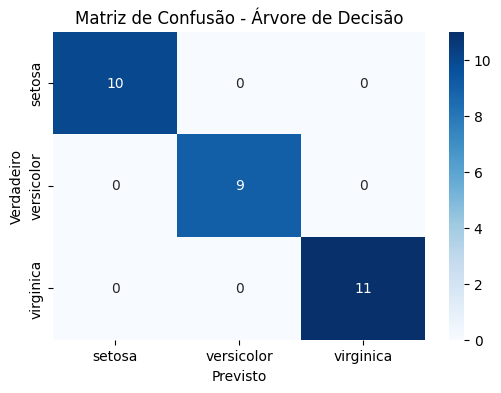

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar matriz de confusão para a Árvore de Decisão
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plotar a matriz de confusão para Árvore de Decisão
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, cmap='Blues', fmt='d', xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

## Conclusão

### Resumo dos Resultados:

- Durante o trabalho, exploramos o dataset Iris e realizamos uma análise detalhada das características através da análise exploratória de dados (EDA).
- Treinamos e avaliamos diferentes modelos de aprendizado de máquina, como KNN, Árvore de Decisão, Random Forest e SVM.
- Todos os modelos apresentaram um desempenho excepcional com uma acurácia muito alta. A Árvore de Decisão e o SVM foram os modelos mais destacados.
- Na validação cruzada, o SVM foi ligeiramente superior em termos de acurácia (95%) comparado aos outros modelos.

### Desempenho dos modelos


- A Árvore de Decisão apresentou uma acurácia de 100% no conjunto de teste e obteve resultados perfeitos em termos de precisão, recall e F1-score.
- O SVM também obteve excelente desempenho, com ajuste de hiperparâmetros para maximizar sua acurácia.
- A análise das matrizes de confusão mostrou que ambos os modelos não cometeram erros no conjunto de teste, o que reforça a simplicidade do dataset Iris.